In [20]:
import numpy as np
import pandas as pd

In [21]:
%pwd

'C:\\Users\\Peter\\Documents\\py'

In [22]:
path = 'bank.csv'

In [23]:
df = pd.read_csv(path, sep=';')

In [24]:
mapping_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
cols_mapping = {}
for col in mapping_list:
    col_mapping = {label : idx for idx, label in enumerate(np.unique(df[col]))}
    cols_mapping[col] = col_mapping
    df[col] = df[col].map(col_mapping)

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [26]:
score = 0.0
features = []
classifer = None
X = None
y = None
y_pred_lr = None

In [27]:
for i in range(0, 100):
    random_features = np.random.choice(16, 2)
#     random_features = [10, 15]
    
    X = df.iloc[:, random_features]
    y = df.iloc[:,-1]
    #
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
    #
    from sklearn.preprocessing import MinMaxScaler
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.fit_transform(X_test)
    #
    #svm, ligit, decision tree
    from sklearn.metrics import accuracy_score
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(C=1000.0, random_state=0, penalty='l1')
    lr.fit(X_train_norm, y_train)
    y_pred_lr = lr.predict(X_test_norm)
    score_lr = accuracy_score(y_test, y_pred_lr)
    if score_lr > score:
        score = score_lr
        features = random_features
        classifer = lr
    #
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state = 0, gamma=0.10, C=10.0)
    svm.fit(X_train_norm, y_train)
    y_pred_svm = svm.predict(X_test_norm)
    score_svm = accuracy_score(y_test, y_pred_svm)
    if score_svm > score:
        score = score_svm
        features = random_features
        classifer = svm
    #
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
    tree.fit(X_train_norm, y_train)
    y_pred_tree = tree.predict(X_test_norm)
    score_tree = accuracy_score(y_test, y_pred_tree)
    if score_tree > score:
        score = score_tree
        features = random_features
        classifer = tree

In [28]:
score

0.88755527479469365

In [29]:
features

array([14, 15])

In [30]:
classifer

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

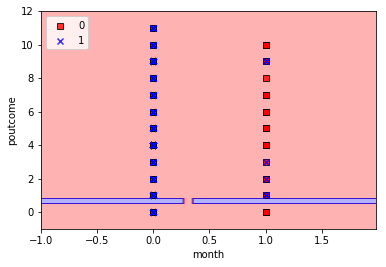

In [33]:
%matplotlib inline
plot_decision_regions(X.values, y.values, classifier=classifer)
plt.xlabel('month')
plt.ylabel('poutcome')
plt.legend(loc='upper left')
plt.show()

In [34]:
np.unique(y_pred_lr)

array([0], dtype=int64)